<a href="https://colab.research.google.com/github/kenjcastilla/Personal/blob/master/Brandon_Ingram_2016_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""My name is Kendall Castilla, and this is my notebook for visualizing data.
I plan to clean the data and eventually use it to predict future stats.
This data comes from basketball-reference.com"""

'My name is Kendall Castilla, and this is my notebook for visualizing data.\nI plan to clean the data and eventually use it to predict future stats.\nThis data comes from basketball-reference.com'

# Importing and Cleaning

---



In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np


In [ ]:
#Reading in CSV file of season 2016-17 from Drive
df_201617_raw = pd.read_csv('/content/drive/MyDrive/Data/BI14_Data/brandon_ingram_2016_17_stats.csv')
df_201617_raw.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,10/26/16,19-054,LAL,NaN,HOU,W (+6),0,23:40,4.0,6.0,0.667,1.0,2.0,0.5,0.0,0.0,NaN,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,9.0,6.3,10.0
1,2,2.0,10/28/16,19-056,LAL,@,UTA,L (-7),0,04:11,1.0,2.0,0.500,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.6,3.0
2,3,3.0,10/30/16,19-058,LAL,@,OKC,L (-17),0,20:51,3.0,10.0,0.300,0.0,3.0,0.0,3.0,4.0,0.75,1.0,4.0,5.0,2.0,1.0,0.0,1.0,1.0,9.0,5.7,-6.0
3,4,4.0,11/1/16,19-060,LAL,@,IND,L (-7),0,14:39,1.0,4.0,0.250,0.0,2.0,0.0,0.0,0.0,NaN,0.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,-0.6,-3.0
4,5,5.0,11/2/16,19-061,LAL,@,ATL,W (+7),0,21:37,1.0,2.0,0.500,1.0,1.0,1.0,0.0,0.0,NaN,0.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,3.0,1.9,-3.0


In [ ]:
#Cleaning up.

df_201617 = df_201617_raw.rename(columns={'Unnamed: 5':'Home_Away'})
df_201617 = df_201617.rename(columns={'Unnamed: 7':'Win_Loss'})

#I want to get rid of a few columns, as they are not all necessary
df_201617 = df_201617.drop(columns=['Rk', 'Tm', 'Date', 'Age'])

#Dropping the rows where he didn't play
df_201617 = df_201617.dropna(subset=['G'])

df_201617.head()

,G,Home_Away,Opp,Win_Loss,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,NaN,HOU,W (+6),0,23:40,4.0,6.0,0.667,1.0,2.0,0.5,0.0,0.0,NaN,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,9.0,6.3,10.0
1,2.0,@,UTA,L (-7),0,04:11,1.0,2.0,0.500,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.6,3.0
2,3.0,@,OKC,L (-17),0,20:51,3.0,10.0,0.300,0.0,3.0,0.0,3.0,4.0,0.75,1.0,4.0,5.0,2.0,1.0,0.0,1.0,1.0,9.0,5.7,-6.0
3,4.0,@,IND,L (-7),0,14:39,1.0,4.0,0.250,0.0,2.0,0.0,0.0,0.0,NaN,0.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,-0.6,-3.0
4,5.0,@,ATL,W (+7),0,21:37,1.0,2.0,0.500,1.0,1.0,1.0,0.0,0.0,NaN,0.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,3.0,1.9,-3.0


In [ ]:
#Checking for null/NaN values in the set.
df_201617.isnull().any().sum

<bound method Series.sum of G            False
Home_Away     True
Opp          False
Win_Loss     False
GS           False
MP           False
FG           False
FGA          False
FG%          False
3P           False
3PA          False
3P%           True
FT           False
FTA          False
FT%           True
ORB          False
DRB          False
TRB          False
AST          False
STL          False
BLK          False
TOV          False
PF           False
PTS          False
GmSc         False
+/-          False
dtype: bool>

In [ ]:
#Replacing NaN values using a dictionary
values = {'Home_Away':'Home', '3P%':0, 'FT%':0}
df_201617 = df_201617.fillna(value=values)
df_201617['Home_Away'] = df_201617['Home_Away'].replace({'@':'Away'})
df_201617.head()

,G,Home_Away,Opp,Win_Loss,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,Home,HOU,W (+6),0,23:40,4.0,6.0,0.667,1.0,2.0,0.5,0.0,0.0,0.000,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,9.0,6.3,10.0
1,2.0,Away,UTA,L (-7),0,04:11,1.0,2.0,0.500,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.6,3.0
2,3.0,Away,OKC,L (-17),0,20:51,3.0,10.0,0.300,0.0,3.0,0.0,3.0,4.0,0.750,1.0,4.0,5.0,2.0,1.0,0.0,1.0,1.0,9.0,5.7,-6.0
3,4.0,Away,IND,L (-7),0,14:39,1.0,4.0,0.250,0.0,2.0,0.0,0.0,0.0,0.000,0.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0,-0.6,-3.0
4,5.0,Away,ATL,W (+7),0,21:37,1.0,2.0,0.500,1.0,1.0,1.0,0.0,0.0,0.000,0.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,3.0,1.9,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,75.0,Away,SAS,W (+7),1,09:36,3.0,4.0,0.750,0.0,0.0,0.0,2.0,2.0,1.000,1.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,8.0,10.2,13.0
78,76.0,Home,SAC,W (+4),1,25:04:00,6.0,14.0,0.429,0.0,2.0,0.0,2.0,3.0,0.667,2.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,14.0,8.9,-5.0
79,77.0,Home,MIN,W (+1),1,29:59:00,3.0,10.0,0.300,1.0,1.0,1.0,3.0,5.0,0.600,2.0,0.0,2.0,1.0,2.0,1.0,2.0,4.0,10.0,4.6,-7.0
80,78.0,Home,NOP,W (+12),1,28:24:00,6.0,16.0,0.375,0.0,2.0,0.0,3.0,5.0,0.600,3.0,2.0,5.0,6.0,2.0,0.0,1.0,1.0,15.0,12.9,8.0


In [ ]:
#Now when we check for null/NaN values, we see that there are none.
df_201617.isnull().any().count()

26

In [ ]:
"""Some of the MP (minutes played) values show miliseconds while others don't.
They should all follow one format, so I'll fix that here."""

times_list = df_201617.MP.values
#times_list = times.tolist()

for time in range(0, len(times_list)):
  t = str(times_list[time])
  if len(t) > 5:
    t = t[:5]
  sec = float(t[3:]) / 60
  times_list[time] = round(float(t[:2]) + sec, 1)
  #print(time)
print(times_list)
df_201617.loc['MP'] = pd.Series(times_list)
df_201617['MP']

[23.7 4.2 20.9 14.7 21.6 27.2 25.0 26.2 27.8 22.2 26.6 24.3 27.2 20.4 25.1
 34.4 38.6 28.6 29.4 41.1 35.4 39.2 25.2 33.0 30.7 25.7 26.1 25.6 20.7
 40.8 28.4 34.5 23.3 27.5 31.1 31.6 25.5 24.6 37.4 28.1 26.8 26.0 31.8
 31.4 28.3 36.8 32.7 36.3 19.4 20.5 20.6 21.4 32.6 32.5 27.0 20.2 27.1
 28.6 38.6 35.4 42.1 25.6 39.0 35.4 40.4 38.0 26.8 39.4 34.5 40.0 40.2
 30.2 23.8 23.2 9.6 25.1 30.0 28.4 29.4]


0     23.7
1      4.2
2     20.9
3     14.7
4     21.6
      ... 
78    25.1
79      30
80    28.4
81    29.4
MP     NaN
Name: MP, Length: 80, dtype: object

# Visualization and Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

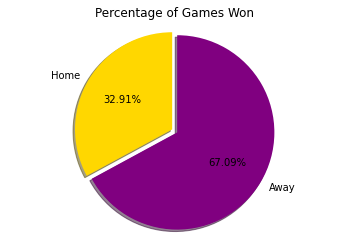


We see that 26 or 32.91% of the Lakers games (2016-17 season) that Brandon Ingram played in were won at home. 
Therefore, 53 or 67.09% of those games were won on the road.


In [ ]:
"""I want to see the relationship between playing at Home vs playing Away and win percentage."""

#Collecting Home and Away wins and respective percentages
home_games_won = df_201617[df_201617['Home_Away'].any()== 'Home' and df_201617['Win_Loss'].str.match('^W.*')==True]['Win_Loss'].count()
away_games_won = df_201617.G.count() - home_games_won
home_win_pct = (home_games_won / df_201617['G'].count()) * 100
away_win_pct = (away_games_won / df_201617['G'].count()) * 100

#Creating labels and data for the pie chart
labels = ['Home', 'Away']
sizes = [home_win_pct, away_win_pct]
explode = (0, 0.06)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90, colors=['gold', 'purple'])
ax.axis('equal')
ax.set_title('Percentage of Games Won')

plt.show()
print(f"\nWe see that {home_games_won} or {round(home_win_pct, 2)}% of the Lakers games (2016-17 season) that Brandon Ingram \
played in were won at home. \nTherefore, {away_games_won} or {round(away_win_pct, 2)}% of those games were won on the road.")


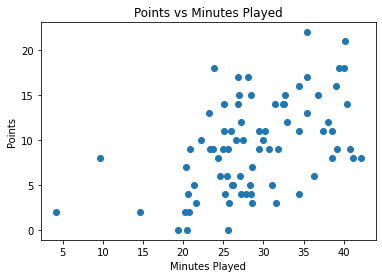

In [ ]:
"""Next, I want to see the correlation between Brandon's minutes played and points scored.
This cell uses matplotlib.pyplot, while the next cell uses pyplot and seaborn."""

mp_pts = df_201617[['MP', 'PTS']]
fig, ax = plt.subplots()
ax.scatter(mp_pts.MP, mp_pts.PTS)
ax.set_title('Points vs Minutes Played')
ax.set_xlabel('Minutes Played')
ax.set_ylabel('Points')

plt.show()

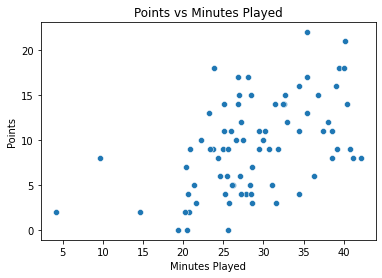

In [ ]:
"""This cell produces the same result as the one above. I just used seaborn instead."""
plt.cla()
ax = sns.scatterplot(x='MP', y='PTS', data=df_201617)
ax.set(xlabel='Minutes Played', ylabel='Points', title='Points vs Minutes Played')
plt.show()
plt.cla()